##### 보스톤 주택 가격 데이터셋으로 네트워크를 이용한 회귀 분석

In [1]:
# Boston Housing Dataset는 1978년 미국 보스톤 지역의 주택 가격으로 506개 타운의 주택 가격 중앙값을 
# 1000달라 단위로 나타내고 있다. 범죄율, 주택당 방개수, 고속도로까지의 거리 등 13가지 데이터를 이용해서 
# 주택가격을 예측해야 한다.
#
# 훈련데이터로 학습할 때 일부 데이터를 떼어내서 검증(validation)데이터로 만들 수 있다. 학습에 쓰이는 데이터는 
# 훈련데이터, 검증에 쓰이는 데이터는 검증데이터, 최종 평가에 쓰이는 데이터는 테스트데이터이다.
# 이 가운데 딥러닝 네트워크의 가중치에 영향을 주는 데이터는 훈련데이터뿐임을 기억하자!!!
# 훈련데이터의 일부를 떼어서 검증데이터로 만들어야 하는데 보통 전체 데이터의 20% 정도를 사용한다.
# 즉 훈련, 검증, 테스트 데이터의 비율은 약 6:2:2 정도가 된다.

from tensorflow.keras.datasets import boston_housing

(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(len(train_X), len(test_X))
print(train_X[0])
print()
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]

15.2


In [2]:
# 보스톤 주택 가격 데이터세트의 각 데이터 속성은 다음과 같다.
# CRIM(범죄율), ZN(25,000평방피트당 주거지역의 비율), INDUS(비소매 상업지구 비율(단위:에이커)), 
# CHAS(찰스강에 인접해 있으면 1, 그렇지 않으면 0), NOX(일산화질소 농도(단위:0.1ppm)), RM(주택당 방의 수), 
# AGE(1940년 이전에 건설된 주택의 비율), DIS(5개의 보스톤 직업고용센터와의 거리(가중 평균)), RAD(고속도로 접근성), 
# TAX(재산세율), PTRATIO(학생/교사 비율), B(흑인 비율), LSTAT(하위계층비율), MEDV(타운의 주택가격 중앙값(1000달라))

# 위 설명에서 주목해야 할 점은 각 데이터의 단위가 다르다는 것이다. 비율(%)인 것도 있고, 0/1로 나타내는 데이터,
# 양의 정수등 다양하다. 실생활에서 얻는 데이터는 이처럼 다양한 단위를 가지고 있는 경우가 많다. 
# 딥러닝에서는 이러한 데이터를 전처리해서 졍규화해야 학습 효율이 좋다.(표준정규분포로 옮긴다)

x_mean = train_X.mean()
x_std = train_X.std()
y_mean = train_Y.mean()
y_std = train_Y.std()

train_X = (train_X - x_mean)/x_std
test_X = (test_X - x_mean)/x_std
    
train_Y = (train_Y - y_mean)/y_std
test_Y = (test_Y - y_mean)/y_std

print(train_X[0])
print()
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]

-0.7821526033779157


In [3]:
# 계속해서 Sequential Model을 사용해서 네트워크를 구성하겠다.
import tensorflow as tf

In [4]:
# 속성의 수도 13개로 많고 데이터 양도 많기 때문에 4개의 레이어를 사용했고 각 레이어에 들어가는 뉴런의 수도 늘렸다.
# 레이어수와 은닉층의 뉴런수를 늘리면 모델의 표현력이 좋아지기 때문에 더 복잡한 내용을 학습시킬 수 있다.
# 지금처럼 여러개의 레이어를 겹쳐서 사용할 때는 시그모이드, tanh보다 relu가 더 좋은 결과를 얻을 수 있다.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13, )),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

model.summary()   # 14*52=728, 53*39=2067, 40*26=1040, 27*1=27

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델 정의를 끝냈으므로 이제 모델을 학습시키자.
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 2s 19ms/step - loss: 1.8269 - val_loss: 1.3435
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 0.7047 - val_loss: 1.1674
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6805 - val_loss: 1.0883
Epoch 4/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6685 - val_loss: 1.0545
Epoch 5/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6342 - val_loss: 1.0952
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6388 - val_loss: 0.9869
Epoch 7/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6493 - val_loss: 1.1482
Epoch 8/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6900 - val_loss: 0.9744
Epoch 9/25
10/10 [==============================] - 0s 7ms/step - loss: 0.6278 - val_loss: 0.9937
Epoch 10/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6118 - val_loss: 0.9843
Epoch 11/25
10/10 

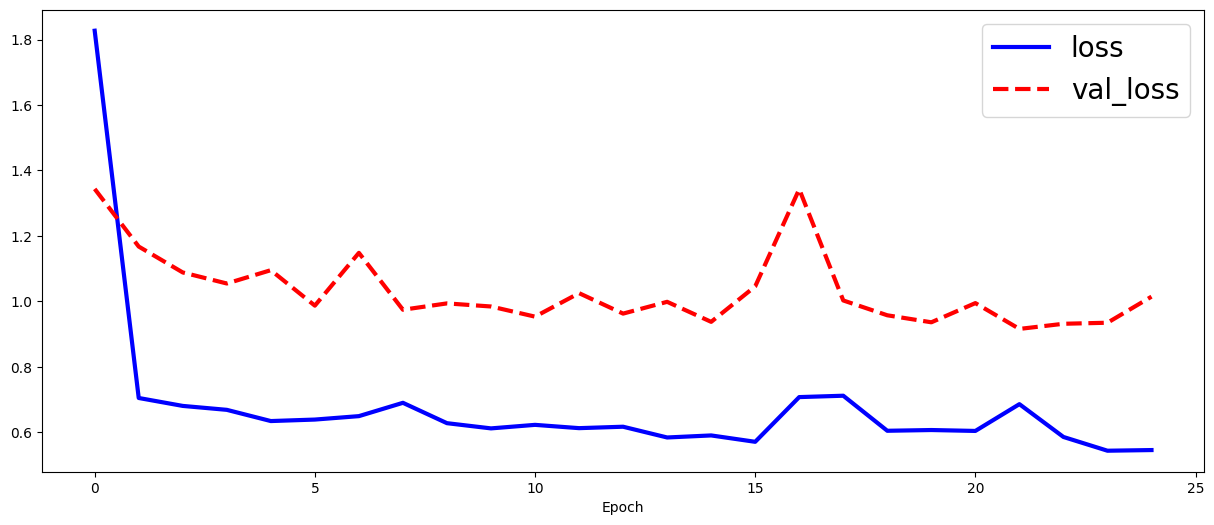

In [6]:
# model.fit()에는 훈련데이터의 25%정도를 검증데이터로 분리해서 학습결과를 검증하기 위해 validation_split
# 이라는 인수가 추가됐는데 그 결과 각 epoch의 학습 결과 출력에 loss와 val_loss가 함께 표시된다.
# loss는 꾸준히 감소하지만 val_loss는 loss보다 높은 값을 유지하면서 항상 감소하지는 않음을 알 수 있다.
# 학습 결과를 한눈에 알아보기 위해 그래프로 시각화해보자.

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(history.history['loss'], 'b-', linewidth=3, label='loss')
plt.plot(history.history['val_loss'], 'r--', linewidth=3, label='val_loss')
plt.xlabel('Epoch')
plt.legend(fontsize=20)
plt.show()

In [7]:
# 일단 50회까지 훈련을 마친 상태에서 테스트 데이트를 이용해 회귀모델을 평가해보자
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 5ms/step - loss: 0.6764


0.6764488220214844

4/4 [==============================] - 0s 3ms/step


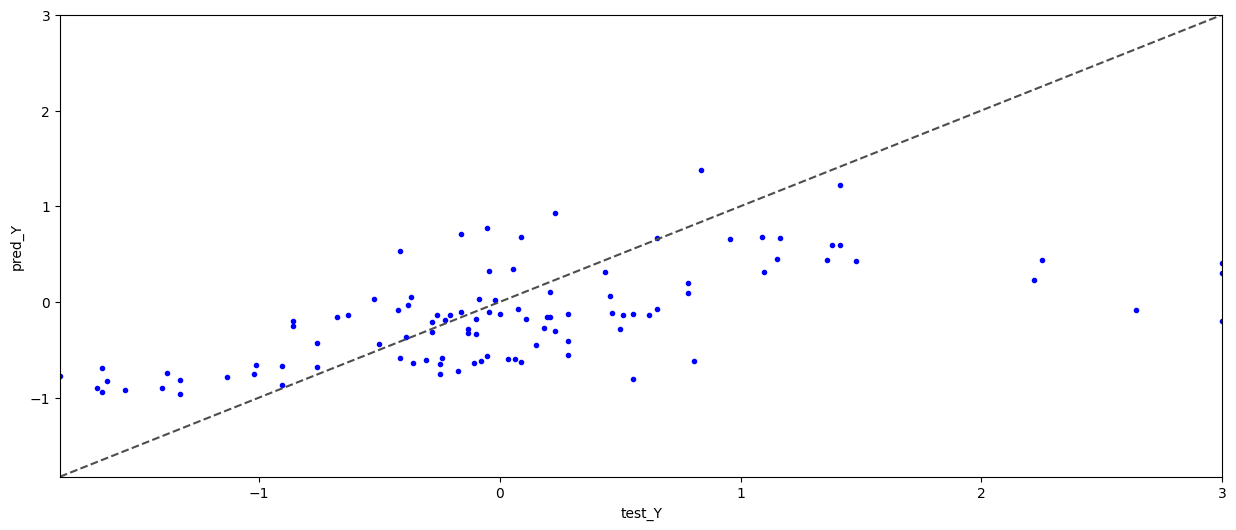

In [11]:
# 훈련데이터의 손실이 0.6인 것과 비교했을 때 0.7097의 테스트 데이터 손실을 좀 커 보인다.
# 이제 네트워크가 얼마나 잘 예측하는지 확인해보기 위해 실제 주택 가격과 예측 주택 가격을 1:1로 비교해보자.

pred_Y = model.predict(test_X)

plt.figure(figsize=(15, 6))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])   # axis([xmin, xmax, ymin, ymax])

# y = x에 해당하는 대각선 그리기
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel("test_Y")
plt.ylabel("pred_Y")

plt.show()

In [12]:
# 다양한 실제 주택가격에 대해서 예측 주택가격은 비교적 일정한 값들에 머물러 있는 것 같다.
# 이상적으로야 대각선상에 모든 점들이 위치해야겠지만 지금의 모습은 그것과는 상당히 거리가 있어 보인다.
# 검증데이터와 테스트데이터에 대해 모두 좋은 예측성적을 내려면 어떻게 해야 할까?
# 검증데이터와 테스트데이터는 훈련데이터와는 달리 네트워크의 가중치에 영향을 미치지 않는다는 공통점이 있지만
# 검증데이터에 대한 성적이 좋아지면 테스트데이터에 대한 성적 또한 좋아질 것 같다.
# 검증데이터에 대한 성적이 좋아지려면 val_loss가 높아지지 않도록, 즉 네트워크가 훈련데이터에 과적합되지 않도록
# 학습 도중에 끼어들어서 학습을 멈춰야 한다. 학습도중에 끼어들기 위해서는 callback함수를 사용한다.
# callback함수는 모델을 학습할 때 epoch가 끝날 때마다 호출된다.
# model.fit()함수에 callbacks 인수를 사용해 callback함수의 리스트를 지정할 수 있다.

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=13, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 0s 18ms/step - loss: 1.3647 - val_loss: 3.4207
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 1.5832 - val_loss: 1.0996
Epoch 3/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7379 - val_loss: 1.2290
Epoch 4/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7959 - val_loss: 1.1059
Epoch 5/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7075 - val_loss: 1.0330
Epoch 6/25
10/10 [==============================] - 0s 8ms/step - loss: 0.7112 - val_loss: 1.1480
Epoch 7/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6531 - val_loss: 1.0411
Epoch 8/25
10/10 [==============================] - 0s 8ms/step - loss: 0.6534 - val_loss: 1.0915


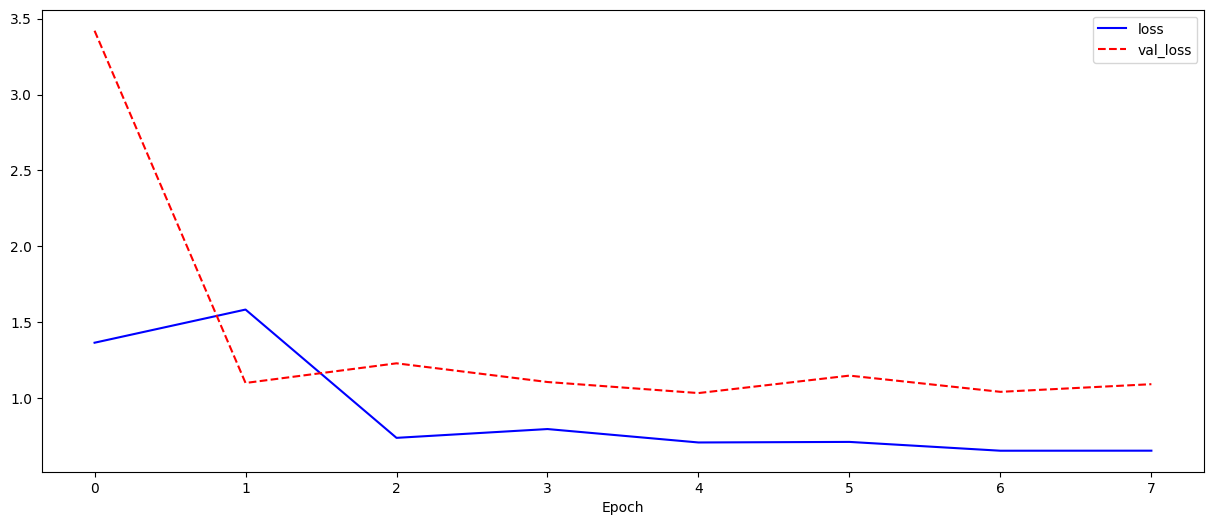

In [13]:
# callback함수의 리스트에 들어간 함수는 tf.keras.callbacks.EarlyStopping이다. 
# 말 그대로 학습을 일찍 멈추는 기능을 하는 함수로, patience는 몇 번의 epoch를 기준으로 삼을 것인지, 
# monitor는 어떤 값을 지켜볼 것인지에 대한 인수이다. 여기서는 val_loss가 3회의 epoch를 수행하는 동안 최고기록을 
# 갱신하지 못한다면 학습을 멈추게 된다. 위에서는 epoch 5에서 최고기록인 val_loss=1.0330을 6,7,8 epoch에서 갱신
# 하지 못했기 때문에 epoch 8에서 학습을 멈췄다.

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()